<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Position_Salaries.csv')
df
df.shape

(10, 3)

In [ ]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2:3].values

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [ ]:
svr = SVR(kernel='rbf')
svr.fit(X,y)

SVR()

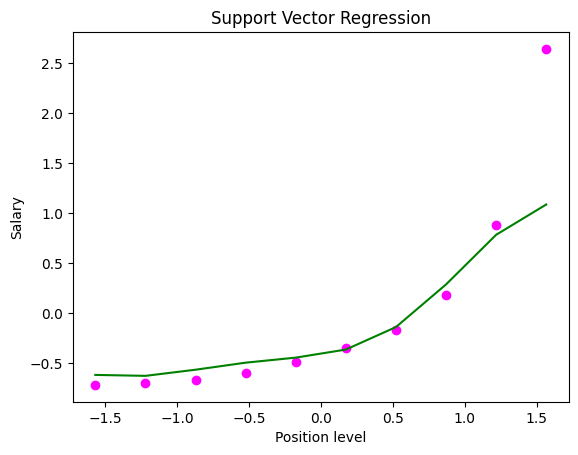

In [ ]:
plt.scatter(X, y, color = 'magenta')
plt.plot(X, svr.predict(X), color = 'green')
plt.title('Support Vector Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(estimator=svr, param_grid =param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X, y)
print(f"Best Parameters :\n{grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters :
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error : {mse:.3f}")
r2_score = r2_score(y, y_pred)
print(f"R2 Score : {r2_score:.3f}")

Mean Squared Error : 0.327
R2 Score : 0.673
